### _Classification : E Commerce Shipping Data_ ###
- I have implemented gradient descent to find the minimum value for cost function that gives the optimum value of w,b for the logistic regression model .

In [2]:
# downloading the dataset using kaggle CLI
! kaggle datasets download prachi13/customer-analytics 

Dataset URL: https://www.kaggle.com/datasets/prachi13/customer-analytics
License(s): other
100%|█████████████████████████████████████████| 121k/121k [00:00<00:00, 177kB/s]
100%|█████████████████████████████████████████| 121k/121k [00:00<00:00, 177kB/s]


In [3]:
from zipfile import ZipFile
zip_path = '/mnt/c/Personal/VS Code/Python/ECommerceShippingData/customer-analytics.zip'
tgt_path = '/mnt/c/Personal/VS Code/Python/ECommerceShippingData/'
with ZipFile(zip_path,'r') as zip_ref:
    zip_ref.extractall(tgt_path)

In [ ]:
#! pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 12.7 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [8]:
import pandas as pd,numpy as np,matplotlib.pyplot as plt, seaborn as sns,plotly as p,sklearn as s

In [10]:
train_df = pd.read_csv('/mnt/c/Personal/VS Code/Python/ECommerceShippingData/Train.csv')

In [12]:
train_df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


#### _Exploratory data analysis on Shipping Dataset_ ####

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [ ]:
#object describe
train_df.describe(include=['O'])

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


In [24]:
#describe numerical
train_df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [74]:
train_df.Mode_of_Shipment.unique()

array(['Flight', 'Ship', 'Road'], dtype=object)

In [50]:
train_df.Mode_of_Shipment.value_counts()

Mode_of_Shipment
Ship      7462
Flight    1777
Road      1760
Name: count, dtype: int64

Text(0.5, 1.0, 'PERCENTAGE MODE OF SHIPMENT')

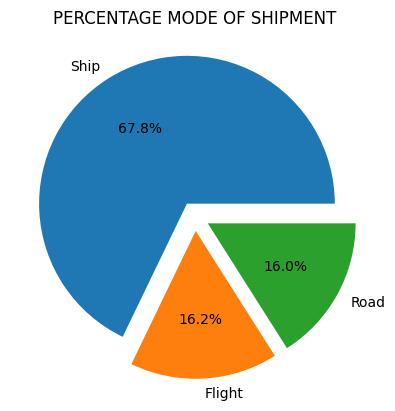

In [66]:
plt.pie(train_df.Mode_of_Shipment.value_counts(),labels=['Ship','Flight','Road'],autopct='%.1f%%',explode=(0.1,0.1,0.1))
plt.title('PERCENTAGE MODE OF SHIPMENT')


Text(0, 0.5, 'Count of labels')

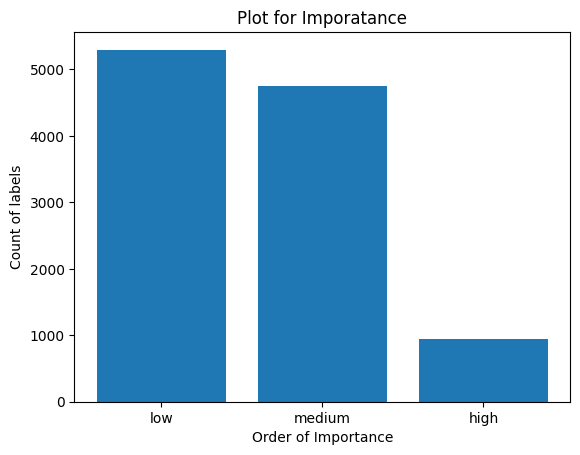

In [92]:
plt.bar(train_df.Product_importance.unique(),train_df.Product_importance.value_counts())
plt.title('Plot for Imporatance')
plt.xlabel('Order of Importance')
plt.ylabel('Count of labels')



In [96]:
#selecting numeric columns

num_df =train_df.select_dtypes(include = 'int64')
num_df

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,4,2,177,3,44,1233,1
1,2,4,5,216,2,59,3088,1
2,3,2,2,183,4,48,3374,1
3,4,3,3,176,4,10,1177,1
4,5,2,2,184,3,46,2484,1
...,...,...,...,...,...,...,...,...
10994,10995,4,1,252,5,1,1538,1
10995,10996,4,1,232,5,6,1247,0
10996,10997,5,4,242,5,4,1155,0
10997,10998,5,2,223,6,2,1210,0


In [98]:
cat_df = train_df.select_dtypes(include='object')
cat_df

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
0,D,Flight,low,F
1,F,Flight,low,M
2,A,Flight,low,M
3,B,Flight,medium,M
4,C,Flight,medium,F
...,...,...,...,...
10994,A,Ship,medium,F
10995,B,Ship,medium,F
10996,C,Ship,low,F
10997,F,Ship,medium,M


In [110]:
processed_df = pd.get_dummies(cat_df,sparse=False,prefix_sep='_',dtype='int64')
processed_df

,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
0,0,0,0,1,0,1,0,0,0,1,0,1,0
1,0,0,0,0,1,1,0,0,0,1,0,0,1
2,1,0,0,0,0,1,0,0,0,1,0,0,1
3,0,1,0,0,0,1,0,0,0,0,1,0,1
4,0,0,1,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,1,0,0,0,0,0,0,1,0,0,1,1,0
10995,0,1,0,0,0,0,0,1,0,0,1,1,0
10996,0,0,1,0,0,0,0,1,0,1,0,1,0
10997,0,0,0,0,1,0,0,1,0,0,1,0,1


In [108]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Warehouse_blockA          10999 non-null  int64
 1   Warehouse_blockB          10999 non-null  int64
 2   Warehouse_blockC          10999 non-null  int64
 3   Warehouse_blockD          10999 non-null  int64
 4   Warehouse_blockF          10999 non-null  int64
 5   Mode_of_ShipmentFlight    10999 non-null  int64
 6   Mode_of_ShipmentRoad      10999 non-null  int64
 7   Mode_of_ShipmentShip      10999 non-null  int64
 8   Product_importancehigh    10999 non-null  int64
 9   Product_importancelow     10999 non-null  int64
 10  Product_importancemedium  10999 non-null  int64
 11  GenderF                   10999 non-null  int64
 12  GenderM                   10999 non-null  int64
dtypes: int64(13)
memory usage: 1.1 MB


In [111]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   ID                   10999 non-null  int64
 1   Customer_care_calls  10999 non-null  int64
 2   Customer_rating      10999 non-null  int64
 3   Cost_of_the_Product  10999 non-null  int64
 4   Prior_purchases      10999 non-null  int64
 5   Discount_offered     10999 non-null  int64
 6   Weight_in_gms        10999 non-null  int64
 7   Reached.on.Time_Y.N  10999 non-null  int64
dtypes: int64(8)
memory usage: 687.6 KB


In [112]:
Target_col = 'Reached.on.Time_Y.N'
num_df.drop(columns=Target_col,inplace=True)

In [133]:
target_df= train_df['Reached.on.Time_Y.N']
target_df

0        1
1        1
2        1
3        1
4        1
        ..
10994    1
10995    0
10996    0
10997    0
10998    0
Name: Reached.on.Time_Y.N, Length: 10999, dtype: int64

In [113]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   ID                   10999 non-null  int64
 1   Customer_care_calls  10999 non-null  int64
 2   Customer_rating      10999 non-null  int64
 3   Cost_of_the_Product  10999 non-null  int64
 4   Prior_purchases      10999 non-null  int64
 5   Discount_offered     10999 non-null  int64
 6   Weight_in_gms        10999 non-null  int64
dtypes: int64(7)
memory usage: 601.6 KB


In [134]:
shipping_df = pd.concat([num_df,processed_df,target_df],axis=1)
shipping_df

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,...,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M,Reached.on.Time_Y.N
0,1,4,2,177,3,44,1233,0,0,0,...,0,1,0,0,0,1,0,1,0,1
1,2,4,5,216,2,59,3088,0,0,0,...,1,1,0,0,0,1,0,0,1,1
2,3,2,2,183,4,48,3374,1,0,0,...,0,1,0,0,0,1,0,0,1,1
3,4,3,3,176,4,10,1177,0,1,0,...,0,1,0,0,0,0,1,0,1,1
4,5,2,2,184,3,46,2484,0,0,1,...,0,1,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,4,1,252,5,1,1538,1,0,0,...,0,0,0,1,0,0,1,1,0,1
10995,10996,4,1,232,5,6,1247,0,1,0,...,0,0,0,1,0,0,1,1,0,0
10996,10997,5,4,242,5,4,1155,0,0,1,...,0,0,0,1,0,1,0,1,0,0
10997,10998,5,2,223,6,2,1210,0,0,0,...,1,0,0,1,0,0,1,0,1,0


In [135]:
shipping_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   ID                         10999 non-null  int64
 1   Customer_care_calls        10999 non-null  int64
 2   Customer_rating            10999 non-null  int64
 3   Cost_of_the_Product        10999 non-null  int64
 4   Prior_purchases            10999 non-null  int64
 5   Discount_offered           10999 non-null  int64
 6   Weight_in_gms              10999 non-null  int64
 7   Warehouse_block_A          10999 non-null  int64
 8   Warehouse_block_B          10999 non-null  int64
 9   Warehouse_block_C          10999 non-null  int64
 10  Warehouse_block_D          10999 non-null  int64
 11  Warehouse_block_F          10999 non-null  int64
 12  Mode_of_Shipment_Flight    10999 non-null  int64
 13  Mode_of_Shipment_Road      10999 non-null  int64
 14  Mode_of_Shipment_Ship 

In [136]:
corr_mat = shipping_df.corr().round(2)
corr_mat

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,...,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M,Reached.on.Time_Y.N
ID,1.00,0.19,-0.01,0.20,0.15,-0.60,0.28,-0.00,0.00,0.00,...,0.00,0.00,0.00,-0.00,-0.06,0.04,0.00,0.00,-0.00,-0.41
Customer_care_calls,0.19,1.00,0.01,0.32,0.18,-0.13,-0.28,-0.01,-0.01,0.00,...,0.01,0.02,0.00,-0.02,-0.05,0.05,-0.02,-0.00,0.00,-0.07
Customer_rating,-0.01,0.01,1.00,0.01,0.01,-0.00,-0.00,-0.01,-0.00,0.00,...,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.01
Cost_of_the_Product,0.20,0.32,0.01,1.00,0.12,-0.14,-0.13,-0.01,0.02,0.01,...,-0.02,-0.01,0.00,0.00,-0.04,0.04,-0.01,-0.02,0.02,-0.07
Prior_purchases,0.15,0.18,0.01,0.12,1.00,-0.08,-0.17,0.00,0.00,-0.00,...,-0.01,-0.00,0.00,-0.00,0.02,-0.02,0.01,0.01,-0.01,-0.06
Discount_offered,-0.60,-0.13,-0.00,-0.14,-0.08,1.00,-0.38,-0.00,-0.01,0.00,...,0.01,-0.01,-0.01,0.01,0.02,-0.02,0.01,0.01,-0.01,0.40
Weight_in_gms,0.28,-0.28,-0.00,-0.13,-0.17,-0.38,1.00,-0.01,0.00,0.00,...,0.00,-0.00,0.00,-0.00,0.07,-0.08,0.04,-0.00,0.00,-0.27
Warehouse_block_A,-0.00,-0.01,-0.01,-0.01,0.00,-0.00,-0.01,1.00,-0.20,-0.20,...,-0.32,0.00,0.00,-0.00,0.01,0.01,-0.02,0.00,-0.00,-0.01
Warehouse_block_B,0.00,-0.01,-0.00,0.02,0.00,-0.01,0.00,-0.20,1.00,-0.20,...,-0.32,-0.00,0.00,-0.00,-0.01,-0.01,0.02,-0.01,0.01,0.01
Warehouse_block_C,0.00,0.00,0.00,0.01,-0.00,0.00,0.00,-0.20,-0.20,1.00,...,-0.32,-0.00,0.00,0.00,0.01,-0.00,-0.00,-0.00,0.00,0.00


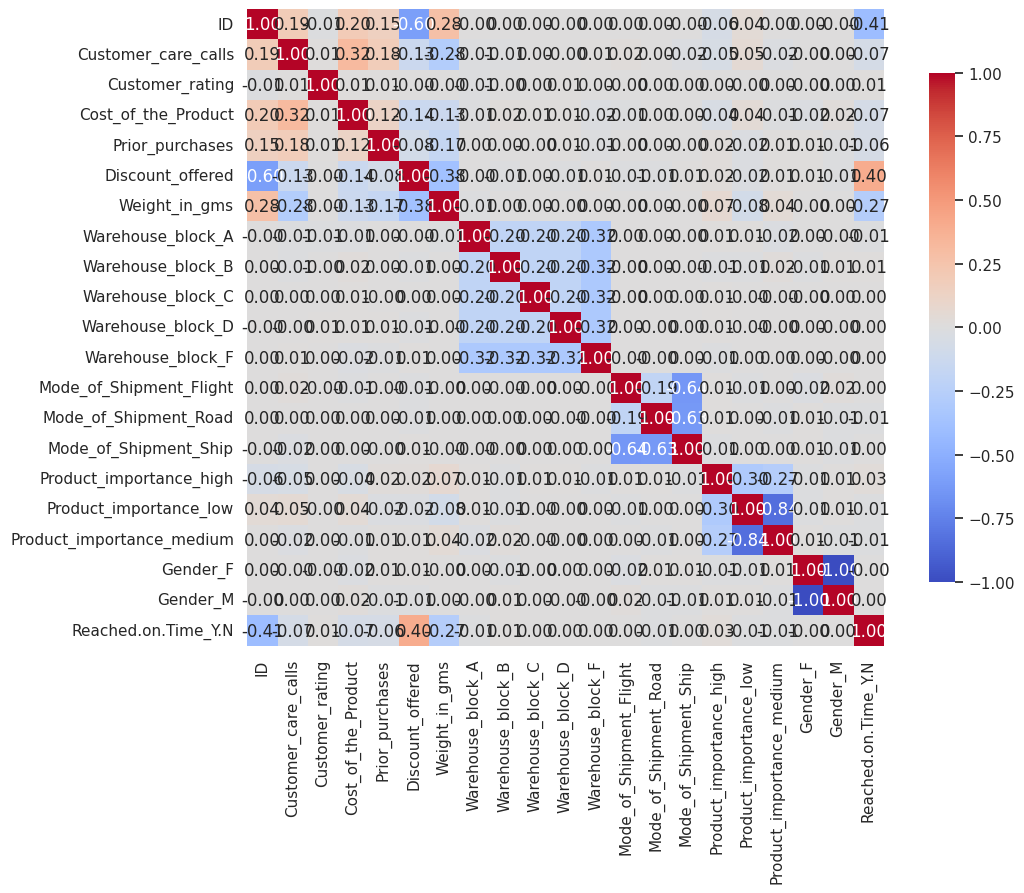

In [139]:
sns.heatmap(corr_mat,annot=True,cmap='coolwarm',square=True, cbar_kws={"shrink": .8},fmt=".2f")
sns.set_theme(rc={'figure.figsize':(30,20)})

There is a notable positive correlation between discount offered and delivery time.